## **CHAPTER 1. FastAPI 개발 환경 구축**

이 장에서는 FastAPI를 이용한 웹 개발 환경을 구축하는 방법을 설명한다.
가상 환경을 구축하기 위해 포어트리를 이용하는 방법을 배우고, 엔드포인트가 하나인 아주 단순한 서버를 구축한다.
또한 FastAPI가 자동으로 생성해주는 API 문서를 살펴보고, 데이터베이스를 활용할 준비를 마친다.

### **1.1. FastAPI 소개**
---

FastAPI(https://fastapi.tiangolo.com)는 파이썬 기반의 오픈소스 웹 프레임워크다.
2018년에 세바스티안 라미레스가 세상에 처음 선보인 이후 꾸준히 발전하고 있다.
넷플릭스, 우버, 시스코 시스템즈 등의 큰 조직에서 널리 활용되고 있다.
스택 오퍼블로우(Stack Overflow)에서 진행한 2024냔 설문 조사 중 '웹 프레임워크 및 기술' 항목에서는 14위를 차지했다.
파이썬 기반의 웹 프레임워크로 제한하면 플라스크, 장고의 뒤를 이어 3위를 차지하고 있다.

FastAPI는 파이썬 3.7 버전 이상을 요구로 한다.
파이썬에서 제공하는 타입 힌트를 적극 활용하고 있다.
공식 문서에서 이야기하는 주요 특징은 다음과 같다.

1. 실행 속도가 빠르다.
    FastAPI는 스탈렛, ASGI와 파이단틱을 적용했다. 이에 다라 현재 사용할 수 있는 파이썬 프레임워크 중 가장 빠른 성능을 자랑한다. Node.js, Go와 비교해 동등한 성능을 가지고 있다.
2. 코드 생산성이 높다.
    다른 프레임워크에 비해 기능 개발 속도가 약 2배에서 3배 빠르다.
3. 버그가 줄어든다.
    개발자가 만드는 오류는 약 40%로 줄어든다.
4. 직관적이다.
    VScode나 PyCharm 같은 훌륭한 편집기의 지원으로 어떤 코드를 작성하든 자동 완성 기능을 사용할 수 있다. 이 덕분에 디버깅에 투자하는 시간이 줄어든다.
5. 쉽다.
    사용하고 배우기 쉽도록 설계됐다. 문서를 읽는 데 들이는 시간이 줄어든다.
6. 간결하다.
    코드 중복을 최소화한다. 각 매개변수를 선언하는 것으로 여러 기능을 얻을 수 있다. 이에 따라 버그가 줄어든다.
7. 강건하다.
    프로덕션에서 사용할 수준의 코드를 쉽게 작성할 수 있다. 또한 API 문서를 자동으로 생성한다.
8. 표준을 준수한다.
    API에 대한 표준인 OpenAPI(이전 swagger) JSON 스키마를 기반으로 하며 이와 완전히 호환된다.

웹 프레임어크 벤치마크 결과를 보면 FastAPI의 성능을 가늠해볼 수 있다.
microdot-asgi-raw는 가볍고, 단순한 웹 프레임워크로서 고성능의 비동기 웹 애플리케이션을 작성할 수 있다.
따라서 마이크로서비스나 IoT 장치와 같이 리소스가 제한된 환경과 같은 기본적인 웹 애플리케이션을 충족시킬 수 있으면 사용할 수 있다.
하지만 여러 라이브러리 생태계와 추가 기능을 이용하기에는 제한적이기 때문에 일반적인 웹 애플리케이션을 개발하기에 적절하지 않다.

파이썬 기반 웹 프레임워크 중 가장 많이 사용하는 장고(Django), 플라스크(Flask)와 FastAPI의 특징을 비교해보자.

* 장고:
    * 기능이 풍부하다. 웹 프레임워크가 갖추어야 할 수많은 기능이 내장돼 있다. 특히 장고의 객체 관계 매핑으로 데이터베이스를 쉽게 다룰 수 있다. 하지만 이로 인해 동작이 무겁고 구동에 시간이 더 소요된다.
    * MVC(model-view-controller) 또는 MVT(model-view-template) 패턴을 기본 아키텍처로 가진다.
    * 장고 어드민 앱을 지원하므로, 어드민 기능을 손쉽게 구현할 수 있다.
    * 공식 문서가 상세하고 참고 자료가 많다.
    * 다른 프레임워크에 비해 학습 시간이 더 필요하다.

* 플라스크:
    * 가볍게 구동시킬 수 있는 서버를 빨리 만들 수 있다.
    * 라우팅, 템플릿, 데이터베이스 연동 등의 기능을 기본으로 제공한다.
    * 기본으로 제공하는 기능이 적으므로 필요한 기능을 확장할 때 적합한 라이브러리를 직접 찾아서 적용해야 한다. 하지만 그만큼 자유도가 높다.
    * 빠르게 프로토타이핑하기에 적합하다.

* FastAPI:
    * 장고와 플라스크의 중간 정도의 기본 기능을 제공하지만 가볍고 속도가 빠르다.
    * 학습 곡선이 낮으므로 쉽게 배울 수 있다.
    * 다른 프레임워크에 비해 커뮤니티 수가 적고 자료가 부족하다.

### **1.2. 포어트리를 이용한 가상 환경과 의존성 관리**
---

포어트리(Poetry)는 패키징 생태계를 더욱 예측 가능하고 간편하게 다룰 수 있는 환경을 제공하는 것을 목표로 하는 오픈소스 프로젝트다.
포어트리를 설치하면 다음과 같은 작업을 수행할 수 있다.

* 새로운 파이썬 프로젝트와 가상 환경을 함께 생성한다.
* 기존 프로젝트에 가상 환경을 초기화할 수 있다.
* 프로젝트 의존성을 관리한다.
* 라이브러리를 패키징한다.

포어트리를 사용하려면 먼저 `pip`를 이용해 먼저 포어트리를 사용자 환경에 설치해야 한다.
참고로 포어트리 공식 문서에는 OS 별로 설치하는 방법을 안내하고 있지만 `pip`를 이용하면 OS에 상관없이 설치해 사용할 수 있다.

In [6]:
%pip install poetry

  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/544.8 kB ? eta -:--:--
   --------------------------------------- 544.8/544.8 kB 17.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/600.3 kB ? eta -:--:--
   --------------------------------------- 600.3/600.3 kB 21.1 MB/s eta 0:00:00
Using cached fastjsonschema-2.21.1-py3-none-any.whl (23 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached shellingham-1.5.4-py2.py3-none-any.whl (9.8 kB)
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 4.3/4.3 MB 42.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 29.0 MB/s eta 0:00:00
Note: you may need to

윈도우를 사용한다면 환경변수 중 `Path` 변수에 파이썬 패키지의 경로를 추가해야 한다.

```
pip install poetry
```

이제 프로젝트 소스를 저장할 디렉터리를 생성하고 `poetry init` 명령어로 가상 환경을 설정한다.

예컨대 패키지를 추가하고자 한다면 다음과 같이 선언할 수 있다.

* 패키지 이름: `requests`
* 패키지와 특정 버전: `requests@^2.23.0`
* 깃 URL: `git+https://github.com/python-poetry/poetry.git`
* 깃 URL과 특정 리비전: `git+https://github.com/python-poetry/poetry.git#develop`
* 로컬 PC의 패키지 설치 파일 경로: `../my-package/my-package.whl`
* 패키지 설치 파일이 있는 URL: `https://example.com/packages/my-package-0.1.0.tar.gz`

가상 환경 설정을 마치면 pyproject.toml 파일이 생성된다.
이제 새로운 패키지가 필요하다면 이 파일에 직접 추가하고 `pip install` 명령으로 설치해도 된다.
참고로 `poetry new {project-name}` 명령어를 실행하면 project-name 디렉터리 생성과 함께 pyproject.toml 파일이 생성된다.

가상 환경을 설정했으나 아직 가상 환경이 실행된 상태는 아니다.
가상 환경을 구동하려면 `poetry shell` 명령을 입력한다.

### **1.3. Hello, FastAPI!**

이제 FastAPI를 설치해본다.

In [1]:
!pip install fastapi

  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 27.4 MB/s eta 0:00:00
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)


FastAPI를 구동시키려면 ASGI(asyncrhonous server gateway interface) 서버가 필요하다.
공식 문서에서는 유비콘 또는 하이퍼콘을 추천한다.

유비콘(Uvicorn)은 파이썬 기반의 ASGI 서버이며, 비동기 코드를 지원한다.
유비콘은 성능이 매우 우수하고 빠르며 대규모 응용 프로그램에 적합하다.
하이퍼콘(Hypercorn)도 비동기 코드를 지원하는 ASGI 서버이지만, 유비콘보다는 약간 느릴 수 있다.
하지만 높은 처리량이나 낮은 지연시간을 필요로 하는 작업에는 하이퍼콘이 적합하다.
하이퍼콘은 여러 프레임워크에 호환되는 플러그인 시스템을 지원해 다양한 설정 및 확장 기능을 제공한다.
이에 비해 유비콘은 주로 FastAPI와 함께 사용되도록 설계됐다.
비동기 처리 방식에 있어 유비콘은 파이썬의 `uvloop` 라이브러리를 사용해 이벤트 루프를 빠르게 처리한다.
하이퍼콘은 멀티 프로세스와 워커를 지원해 멀티 코어 시스템의 병렬처리를 쉽게 할 수 있다.

일반적으로 작은 규모의 프로젝트나 FastAPI만 사용하는 경우에는 유비콘이 적합하고, 더 복잡한 환경에서는 하이퍼콘이 더 많은 유연성을 제공한다고 할 수 있다.

In [2]:
!pip install hypercorn

  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)


In [3]:
!pip install uvicorn

PyPI에는 `uvicorn`'과 `uvicorn[standard]` 두 개가 등록돼 있다.
`uvicorn`은 순수 파이썬 의존성을 가지는 버전이다.
그에 비해 `uvicorn[standard]`는 (가능한) 사이썬 기반 의존성과 기타 선택적 기능이 함께 설치된다.

여기서 사이썬 기반(Cython-based)은 다음과 같은 특징을 가진다.

* 가능하다면 `uvloop(이벤트 루프)`를 설치해 사용한다.
* 가능하다면 `httptools`을 이용해 HTTP 프로토콜을 처리한다.

선택적 기능은 다음을 뜻한다.
* 가능하다면 웹 소켓(WebScoket) 프로토콜을 `websockets`을 통해 처리한다(`wsproto`를 사용하려면 수동으로 설치해야 한다).
* `--reload` 옵션은 `watchfiles`를 사용한다. 이 옵션은 서버를 구동시킨 상태에서 파일을 저장한 후, 변경 사항을 다시 적용해 서버를 재시작하기 위해 사용한다. 개발 환경에서 사용한다.
* 윈도우 사용자의 경우 로그 색상을 표시하기 위해 `colorama`를 설치한다.
* `--env-file` 옵션을 사용하기 위해 `python-dotenv`를 설치한다.
* `--log-config`에 .yaml 파일을 제공할 수 있도록 `PyYAML`을 설치한다.

이제 main.py를 프로젝트 루트 디렉터리에 생성하고 간단한 API를 만들어본다.

In [5]:
# main.py

from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def hello():
    return {"Hello": "FastAPI"}

터미널에서 유비콘으로 서버를 구동한다.
다시 한 번 이야기하지만 포어트리 가상 환경을 실행한 상태에서 실행해야 한다.

In [7]:
%uvicorn main:app --reload

UsageError: Line magic function `%uvicorn` not found.


여기서 `main:app`은 FastAPI 인스턴스가 존재하는 파이썬 파일과 그 인스턴스의 변수를 뜻한다.
즉, `main.py`의 `app` 변수다.
`--reload` 옵션을 추가하면 파일 내용이 변경될 때 애플리케이션이 재시작되므로, 코드를 수정한 다음 서버를 따로 껐다 켤 필요가 없다.
개발 단계에서만 사용하고 배포 환경에서는 사용하지 않도록 하자.

브라우저에서 http://127.0.0.1:8000 주소로 접속하면 응답이 잘 전달되는 것을 확인할 수 있다.

포트를 바꾸고 싶다면 `--port` 옵션을 이용할 수 있다.

In [10]:
uvicorn main:app --reload --port 8080

SyntaxError: invalid syntax (983840723.py, line 1)

`main.py`를 다음과 같이 변경해 `python main.py` 명령어로 구동할 수도 있다.

In [11]:
import uvicorn

from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def hello():
    return {"Hello": "FastAPI"}

if __name__ == "__main__":
    uvicorn.run("main.py", host="127.0.0.1", reload=True)

INFO:     Will watch for changes in these directories: ['c:\\lecture\\jupyternotebook_repo\\jupyternotebook_repo\\API_study\\fast_api\\chapter01']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [30892] using StatReload
INFO:     Stopping reloader process [30892]


### **1.4. API 문서화**
---

API를 만들면 이를 사용할 다른 구성원에게 전달해야 한다.
조직이 작고 API 사용자가 같은 공간에 있으며 프레임워크의 코드를 이해하고 있다면 소스 코드를 공유해도 상관없다.
하지만 사용하는 언어와 기술 스택이 다른 프런트엔드 개발자가 API 사용자라면 어떻게 사용법을 설명해야 할까?
텍스트로 나름의 형식으로 기술할 수도 있고, 스프레드시트에 보기 좋게 정리할 수도 있다.
심지어 아직도 이런 방법을 많이 사용한다.
하지만 프로그램과 마찬가지로 문서도 레거시로 굳어지면 바꾸기 힘든 법이다.
문서를 배포하는 가장 좋은 방법은 소스 코드에서 API 문서를 생성하는 것이고, FastAPI는 이를 별다른 설정 없이 지원한다.

회사에서 사용하는 주요한 외부 시스템은 누구나 알고 있는 모 회사에서도 사용될 만큼 널리 사용되는 시스템이지만 API가 업데이트될 때마다 문서를 엑셀로 전달받는다면 응답에 포함된 내용에 대해 모든 설명이 있지 않을 수도 있다.
종종 하이럼의 법칙(Hyrum's law)에 따라 문서에 빠져 있는 정보를 활용하는 경우다.

조직이 성장하면 인원은 불어난다.
제대로 만들지 않은 API 문서는 API 사용자와의 커뮤니케이션 비용을 증가시킨다.
소프트웨어는 그 이름과 같이 반죽처럼 말랑해서 변경이 매우 잦은 제품이다.
인터페이스에 변경이 일어날 때마다 문서를 함께 변경해주어야 한다.
그래서 잊어버리기도 하고 바쁘다는 핑계로 뒤로 미루기도 한다.
그렇지만 사고는 작은 일이 쌓여서 일어나는 법이다.
누군가 잘못 기술된 API 문서를 보고 잘못 구현을 하고 있을 수 있다.
그렇게 되면 자원을 낭비하는 일이 발생할 수 있다.

FastAPI는 API 코드를 작성하면 API 문서를 자동으로 생성한다.
서버를 꺼두었다면 다시 구동시키자.

브라우저에서 http://localhost:8000/docs 페이지로 접속하면 FastAPI가 자동으로 만들어서 제공하는 API 문서를 볼 수 있다.
이 문서는 OpenAPI 명세(OpenAPI specification, OAS)를 준수한다.
OpenAPI의 예전 이름이 스웨거(swagger)였는데, 이름을 바꾸고 나서 OpenAPI를 지원하는 오픈 소스 프로젝트의 이름이 스웨거가 됐다.
그래서 이를 섞어 쓰면서 헷갈리는 부분이 있다.
이제 명세를 이야기할 때는 정확하게 OpenAPI라고 하자.

OpenAPI 홈페이지에 기술된 OpenAPI 명세의 역할은 다음과 같다.

OpenAPI 명세는 HTTP API에 대한 표준을 정의하고 프로그래밍 언어에 중립적인 인터페이스를 설명한다.
이를 통해 사람과 컴퓨터 모두는 소스 코드나 다른 문서를 확인하지 않아도 되고 다른 네트워크 트래픽을 발생시키지 않고도 서비스의 기능을 이해하고 실행할 수 있다.
OpenAPI를 제대로 정의하면, API 사용자는 최소한의 구현으로 서비스를 이해하고 상호작용할 수 있다.
저수준의 프로그래밍에 있어 인터페이스는 어떤 프로그램을 기술한다.
OpenAPI 명세도 마찬가지다.
서비스 호출에 대한 추측을 없애준다.

API 명세는 JSON으로 기술된다.
접속한 페이지의 왼쪽 상단에 /openapi.json이라는 링크를 클릭하면 JSON으로 된 명세를 확인할 수 있다.
스펙에 대한 더 자세한 내용은 홈페이지를 참고하자.

http://localhost:8000/docs 페이지는 openapi.json에 기술된 내용을 OpenAPI UI로 보여준다.
리독(Redoc) 스타일을 선호한다면 http://localhost:8000/redoc 페이지에서 확인할 수 있다.

이제 앞서 만든 Hello API를 실행해보자.
접혀 있는 항목을 펼처서 [Try it out] 버튼을 누른다.

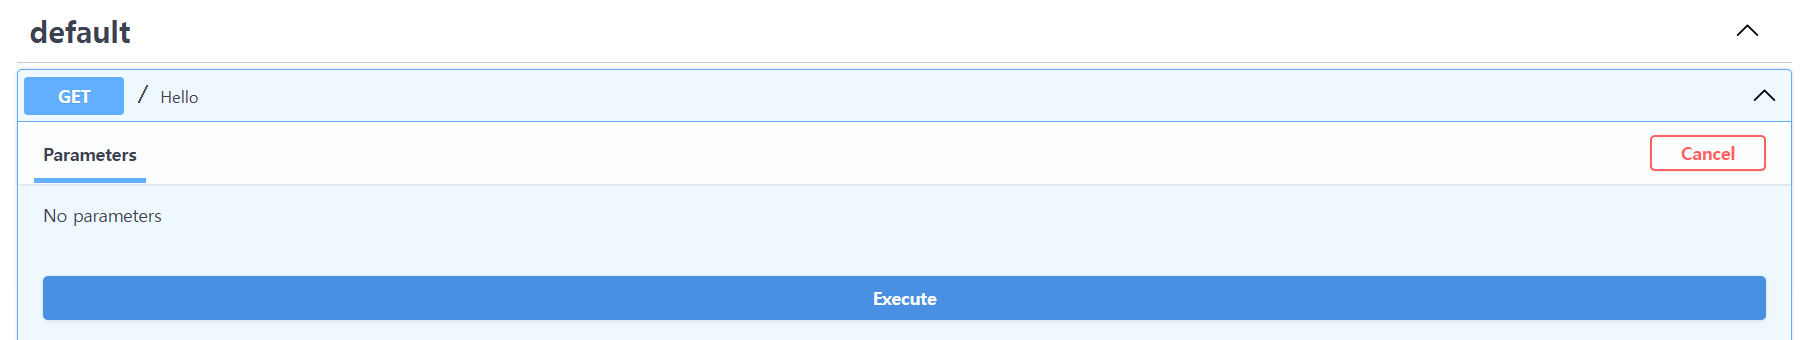

[Execute] 버튼으로 API를 실행할 수 있다.

서버에 접속할 수만 있다면 API 테스트를 위한 코드를 직접 작성할 필요도 없다.
개발자들은 포스트맨(Postman)과 같은 도구로 API를 관리한다.
하지만 간단한 테스트라면 이 API 문서 페이지로 쉽게 수행할 수 있다.

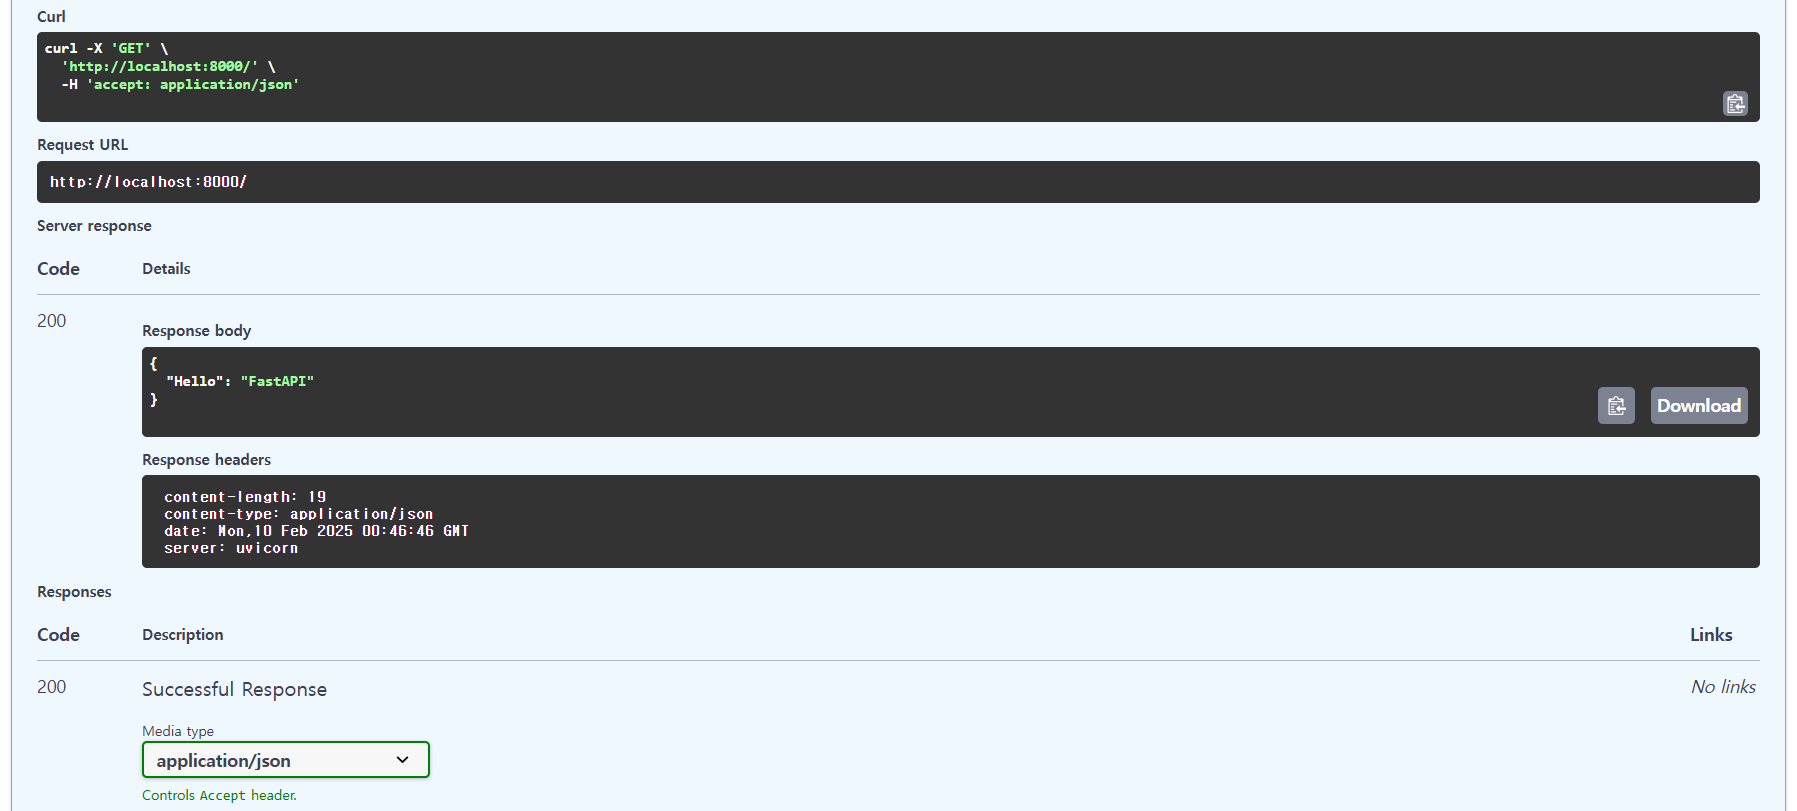

앞으로 API를 호출할 때는 지면 관계상 이 도구를 사용하지 않고 터미널에서 `curl`을 이용한다.

응답 본문의 출력 결과는 `{"Hello":"FastAPI"}`이다.
이 JSON 출력 결과를 읽기 편하도록 바꿔주는 도구인 `jq`를 사용했다.

`jq`는 macOS에서는 `brew install jq` 명령어로, 윈도우 사용자라면 `winget install jqlang.jq` 명령어로 설치할 수 있다.
다른 OS 사용자라면 다운로드 페이지에서 실행 파일을 받을 수 있다.
`jq`에 대한 자세한 사항을 홈페이지를 참고하도록 한다.

자동 생성된 OpenAPI 문서, `curl` 외의 어떤 것도 좋다.
자신에게 편리한 도구를 사용한다.

### **1.5. 데이터베이스 설정**
---

실습에서는 무료 데이터베이스 중에서 가장 널리 사용되고 있는 MySQL을 사용한다.
MySQL의 자세한 사용법과 SQL 문법에 대해서는 이미 배경 지식을 갖추고 있다고 가정한다.
로컬 PC에 직접 MySQL을 설치해도 되지만 다른 프로젝트와 개발 환경을 분리하기 위해 도커를 이용해 실행한다.
각자의 환경에 맞게 도커를 설치하고, 다음 명령어를 실행해본다.
이전에 수행되고 있던 컨테이너의 이름과 충돌이 일어나지 않도록 유의한다.

In [16]:
docker run --name mysql-local -p 3306:3306/tcp -e MYSQL_ROOT_PASSWORD=test -d mysql:8

SyntaxError: invalid syntax (2814469919.py, line 1)

MySQL 버전은 8을 사용하고 DB에 연결할 유저명은 `root`로, 패스워드는 `test`로 설정했다.
여기서 `-d` 옵션은 백그라운드에서 컨테이너를 수행하겠다는 뜻이다.
이 옵션을 주지 않으면 터미널이 계속 컨테이너에 연결돼 있다.

MySQL이 도커에서 잘 실행되고 있는지 확인해보자.

In [17]:
docker ps

SyntaxError: invalid syntax (2275867613.py, line 1)

참고로 컨테이너를 중지시키거나, 중지된 컨테이너를 다시 시작하거나, 실행 중인 컨테이너를 재시작하는 명령어는 다음과 같다.
`CONTAINER-ID` 부분에 앞선 출력 결과에 있는 값(`bcf7fd6a7810`)을 넣으면 된다.

In [1]:
$docker stop CONTAINER-ID
$docker start CONTAINER-ID
$docker restart CONTAINER-ID

SyntaxError: invalid syntax (2639378510.py, line 1)

더 자세한 내용은 도커 허브의 가이드를 참고하자.

이제 애플리케이션에서 사용할 스키마(schema)를 생성해야 한다.
만약 개인이 사용하고 있는 DB GUI 도구가 있다면 이를 이용해도 좋다.
DataGrip, MySQL 워크밴치(MySQL Workbench), DBeaver, Sequel Ace 등이 있다.
여기서는 터미널에서 SQL을 사용하도록 하겠다.
도커 쉘 또는 터미널에서 MySQL에 접속하는 방법은 다음과 같다.
도커로 실행되고 있을 때는 `-h` 옵션을 주어야 한다.

In [2]:
$mysql -u root -h 127.0.0.1 -p

SyntaxError: invalid syntax (1935506002.py, line 1)

실행 중인 도커 컨테이너(Docker container)에 먼저 접속한 후 MySQL에 접속하는 방법도 있다.

In [3]:
$docker exec -it bcf7fd6a7810 bash

SyntaxError: invalid syntax (1566582027.py, line 1)

데이터베이스를 실행할 때 입력했던 패스워드(eddi@123)를 입력한다.

MySQL 셸에 접속했다.

실행 중인 데이터베이스를 출력해보자.

In [5]:
SHOW DATABASES;

SyntaxError: invalid syntax (1921087095.py, line 1)

우리가 사용할 스키마를 생성해야 한다.
여기서 스키마의 이름을 `fastapi-ca`로 지정하겠다.

In [6]:
CREATE SCHEMA `fastapi-ca`;

SyntaxError: invalid syntax (90785059.py, line 1)

스키마가 생성됐다.

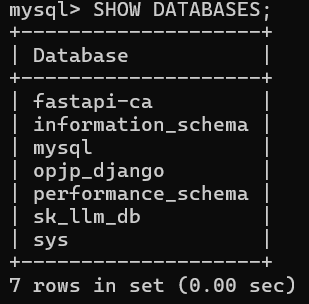